# Test Fitness Funktionen
Teste die verschiedenen Fitness Funktionen und den Einfluss auf die Lösungen.

In [1]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm

# add folder to syspath to import ParticleSwarmOptimization
sys.path.insert(0, os.path.dirname(path)+'/ParticleSwarmOptimization')
 # add folder to syspath to import ACO 
sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35


# Small Problem

## Random Fit

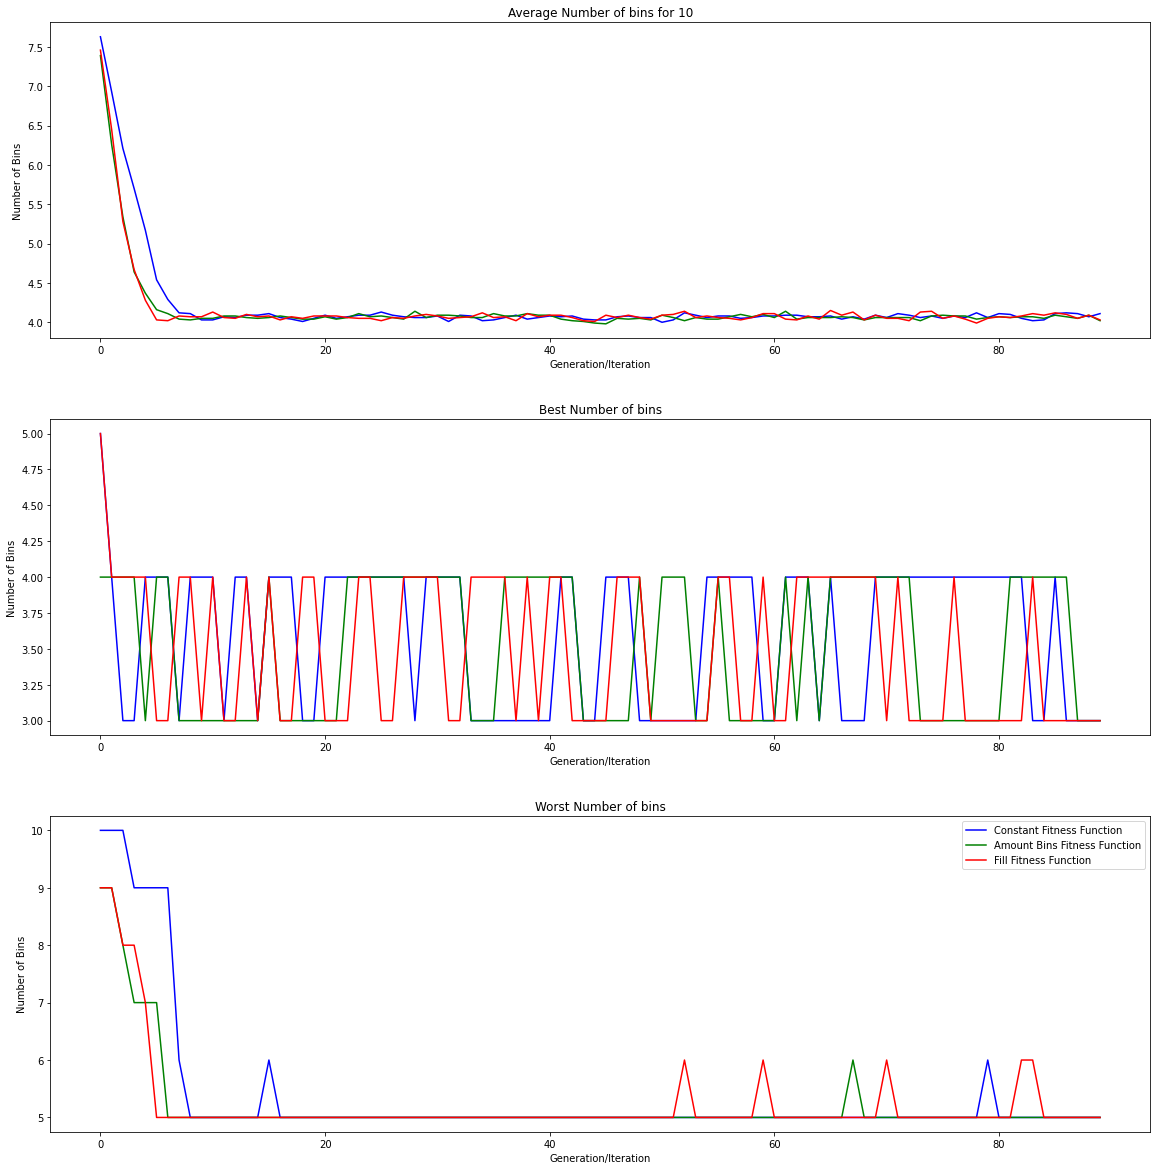

In [3]:
number_generations = 90
GA = GeneticAlgorithm(small_objects, 100, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'constant', 'random' )
solution_const, all_time_best_const, average_vals_const, best_vals_const, worst_vals_const, runtime_const = GA.run()
GA = GeneticAlgorithm(small_objects, 100, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
solution_amount_bins, all_time_best_amount_bins, average_vals_amount_bins, best_vals_amount_bins, worst_vals_amount_bins, runtime_amount_bins = GA.run()
GA = GeneticAlgorithm(small_objects, 100, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
solution_fill, all_time_best_fill, average_vals_fill, best_vals_fill, worst_vals_fill, runtime_fill = GA.run()

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=6)
ax[0].set_title(f'Average Number of bins for {len(small_objects)}')
ax[0].plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax[0].plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[0].plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals_const, color="blue", label = 'Constant Fitness Function')
ax[1].plot(x_vals, best_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[1].plot(x_vals, best_vals_fill, color="red", label = 'Fill Fitness Function')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals_const, color="blue", label = 'Constant Fitness Function')
ax[2].plot(x_vals, worst_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[2].plot(x_vals, worst_vals_fill, color="red", label = 'Fill Fitness Function')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")

plt.legend()
plt.show()

## Random Fit (average)

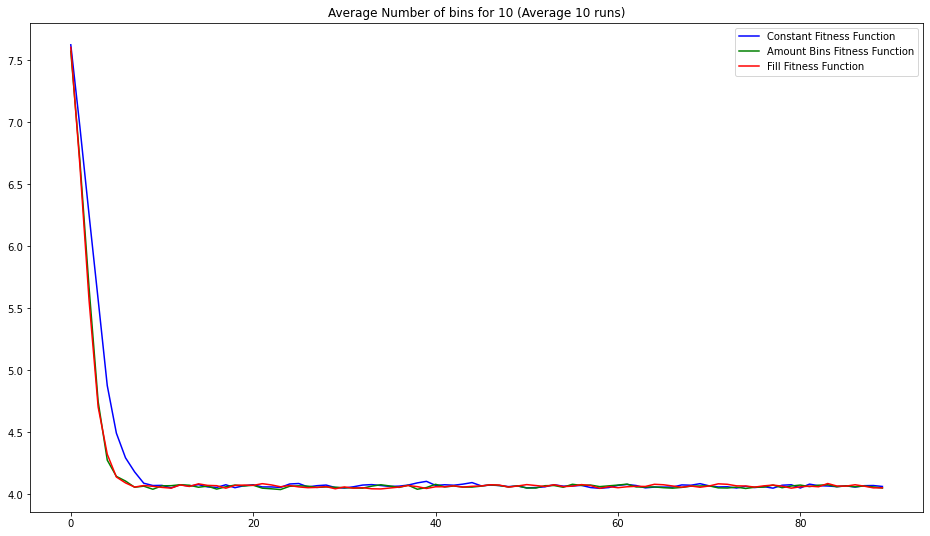

In [4]:
av_number = 10
number_generations = 90
average_vals_const = np.zeros((av_number, number_generations))
average_vals_amount_bins = np.zeros((av_number, number_generations))
average_vals_fill = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'constant', 'random')
    _,_, average_vals_const[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
    _,_, average_vals_amount_bins[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
    _,_, average_vals_fill[index], _,_,_ = GA.run()

# calc average
average_vals_const = np.average(average_vals_const, 0)
average_vals_amount_bins = np.average(average_vals_amount_bins, 0)
average_vals_fill = np.average(average_vals_fill, 0)

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(1,figsize=(16,9))
ax.set_title(f'Average Number of bins for {len(small_objects)} (Average {av_number} runs)')
ax.plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax.plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax.plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')

plt.legend()
plt.show()

## First Fit

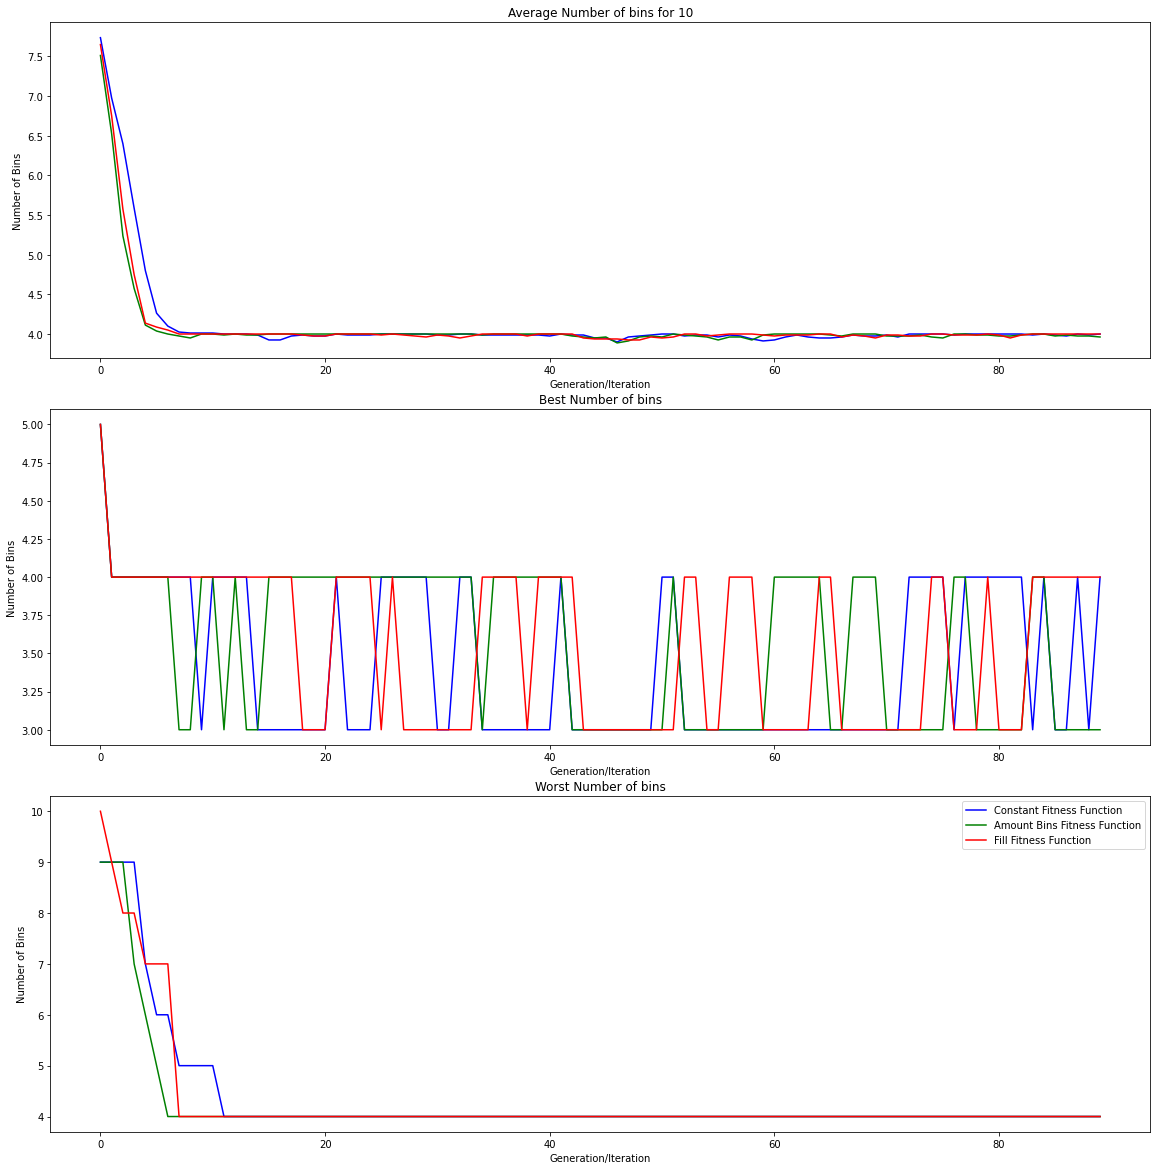

In [5]:
number_generations = 90
GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'constant', 'first_fit')
solution_const, all_time_best_const, average_vals_const, best_vals_const, worst_vals_const, runtime_const = GA.run()
GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'first_fit')
solution_amount_bins, all_time_best_amount_bins, average_vals_amount_bins, best_vals_amount_bins, worst_vals_amount_bins, runtime_amount_bins = GA.run()
GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'fill', 'first_fit')
solution_fill, all_time_best_fill, average_vals_fill, best_vals_fill, worst_vals_fill, runtime_fill = GA.run()

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(small_objects)}')
ax[0].plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax[0].plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[0].plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals_const, color="blue", label = 'Constant Fitness Function')
ax[1].plot(x_vals, best_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[1].plot(x_vals, best_vals_fill, color="red", label = 'Fill Fitness Function')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals_const, color="blue", label = 'Constant Fitness Function')
ax[2].plot(x_vals, worst_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[2].plot(x_vals, worst_vals_fill, color="red", label = 'Fill Fitness Function')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

## First Fit (average)

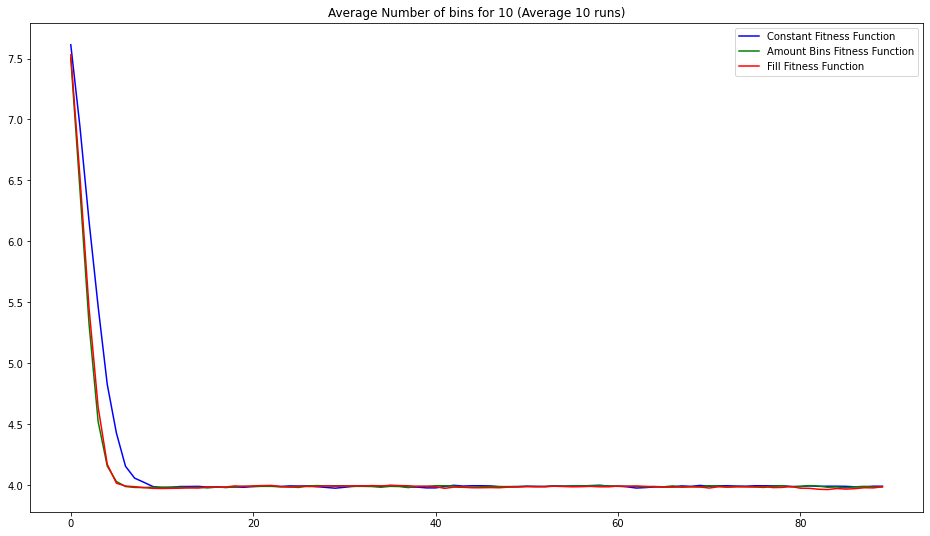

In [6]:
av_number = 10
number_generations = 90
average_vals_const = np.zeros((av_number, number_generations))
average_vals_amount_bins = np.zeros((av_number, number_generations))
average_vals_fill = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'constant', 'first_fit')
    _,_, average_vals_const[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'first_fit')
    _,_, average_vals_amount_bins[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(small_objects, 80, small_container[0], small_container[1], 0.8, 0.05, number_generations, 'fill', 'first_fit')
    _,_, average_vals_fill[index], _,_,_ = GA.run()

# calc average
average_vals_const = np.average(average_vals_const, 0)
average_vals_amount_bins = np.average(average_vals_amount_bins, 0)
average_vals_fill = np.average(average_vals_fill, 0)

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(1,figsize=(16,9))
ax.set_title(f'Average Number of bins for {len(small_objects)} (Average {av_number} runs)')
ax.plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax.plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax.plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')

plt.legend()
plt.show()

# Medium Problem

## Random Fit

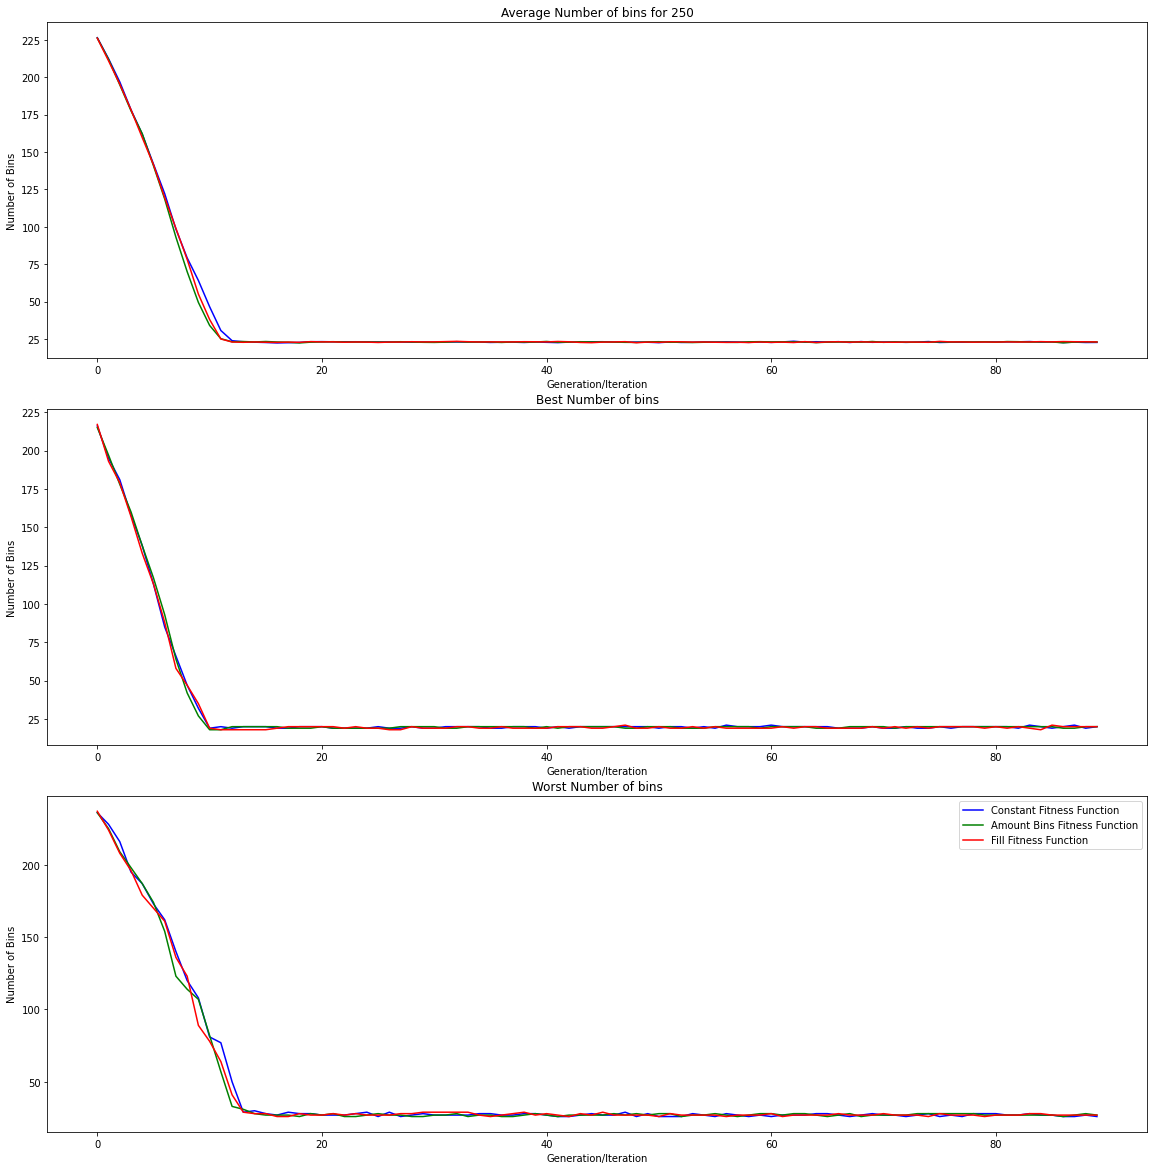

In [7]:
number_generations = 90
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'constant', 'random')
solution_const, all_time_best_const, average_vals_const, best_vals_const, worst_vals_const, runtime_const = GA.run()
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
solution_amount_bins, all_time_best_amount_bins, average_vals_amount_bins, best_vals_amount_bins, worst_vals_amount_bins, runtime_amount_bins = GA.run()
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
solution_fill, all_time_best_fill, average_vals_fill, best_vals_fill, worst_vals_fill, runtime_fill = GA.run()

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(medium_objects)}')
ax[0].plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax[0].plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[0].plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals_const, color="blue", label = 'Constant Fitness Function')
ax[1].plot(x_vals, best_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[1].plot(x_vals, best_vals_fill, color="red", label = 'Fill Fitness Function')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals_const, color="blue", label = 'Constant Fitness Function')
ax[2].plot(x_vals, worst_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[2].plot(x_vals, worst_vals_fill, color="red", label = 'Fill Fitness Function')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

## Random Fit (average)

In [8]:
av_number = 10
number_generations = 90
average_vals_const = np.zeros((av_number, number_generations))
average_vals_amount_bins = np.zeros((av_number, number_generations))
average_vals_fill = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'constant', 'random')
    _,_, average_vals_const[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
    _,_, average_vals_amount_bins[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
    _,_, average_vals_fill[index], _,_,_ = GA.run()

# calc average
average_vals_const = np.average(average_vals_const, 0)
average_vals_amount_bins = np.average(average_vals_amount_bins, 0)
average_vals_fill = np.average(average_vals_fill, 0)

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(1,figsize=(16,9))
ax.set_title(f'Average Number of bins for {len(medium_objects)} (Average {av_number} runs)')
ax.plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax.plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax.plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')

plt.legend()
plt.show()

## First Fit

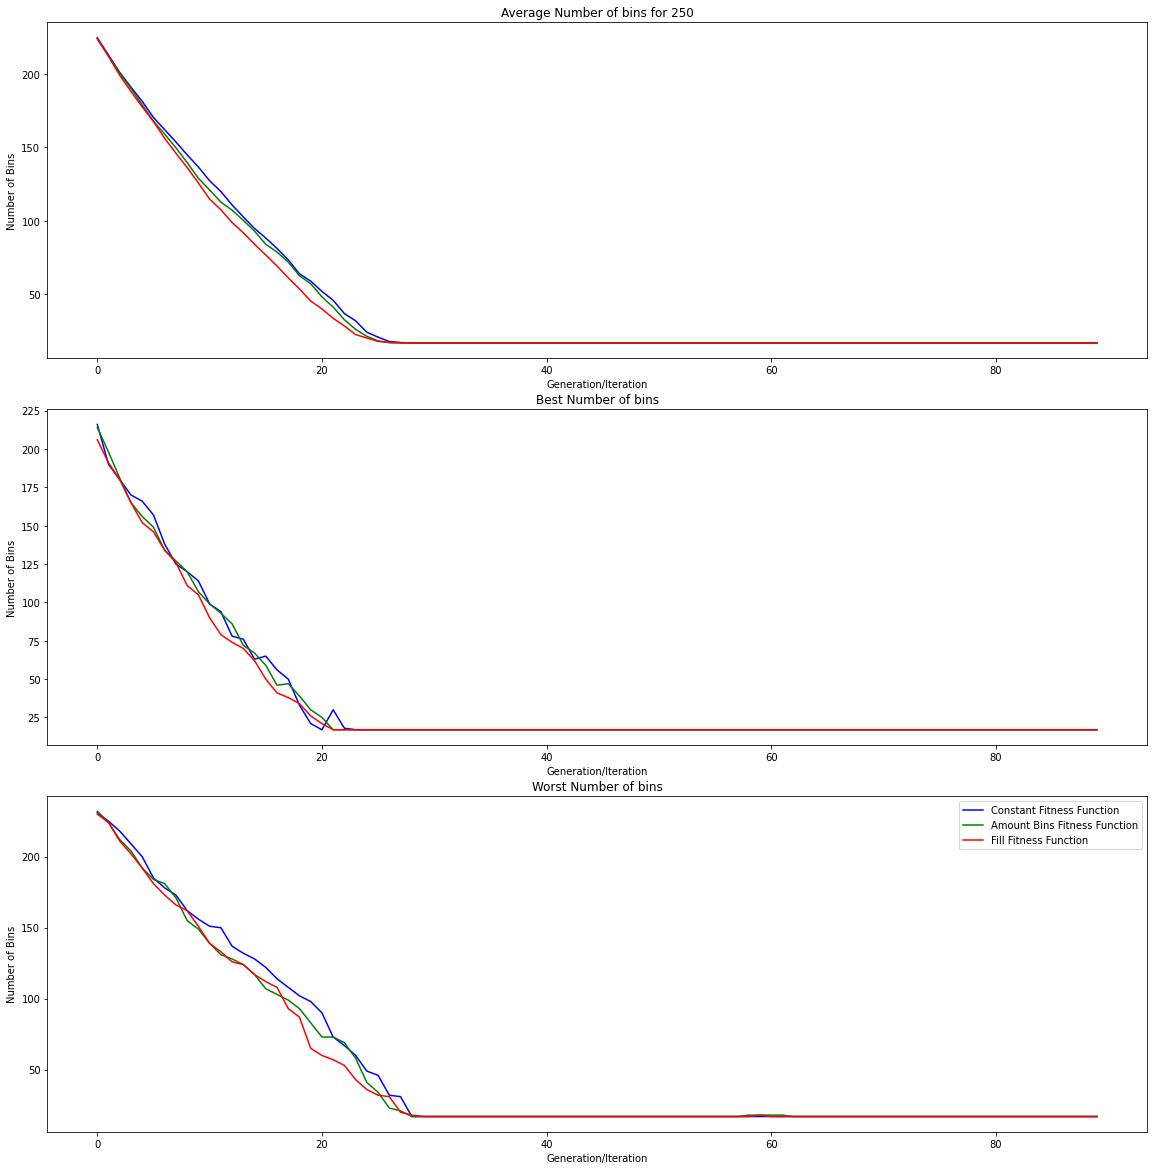

In [9]:
number_generations = 90
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'constant', 'first_fit')
solution_const, all_time_best_const, average_vals_const, best_vals_const, worst_vals_const, runtime_const = GA.run()
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'first_fit')
solution_amount_bins, all_time_best_amount_bins, average_vals_amount_bins, best_vals_amount_bins, worst_vals_amount_bins, runtime_amount_bins = GA.run()
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'fill', 'first_fit')
solution_fill, all_time_best_fill, average_vals_fill, best_vals_fill, worst_vals_fill, runtime_fill = GA.run()

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(medium_objects)}')
ax[0].plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax[0].plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[0].plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals_const, color="blue", label = 'Constant Fitness Function')
ax[1].plot(x_vals, best_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[1].plot(x_vals, best_vals_fill, color="red", label = 'Fill Fitness Function')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals_const, color="blue", label = 'Constant Fitness Function')
ax[2].plot(x_vals, worst_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[2].plot(x_vals, worst_vals_fill, color="red", label = 'Fill Fitness Function')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

## First Fit (average)

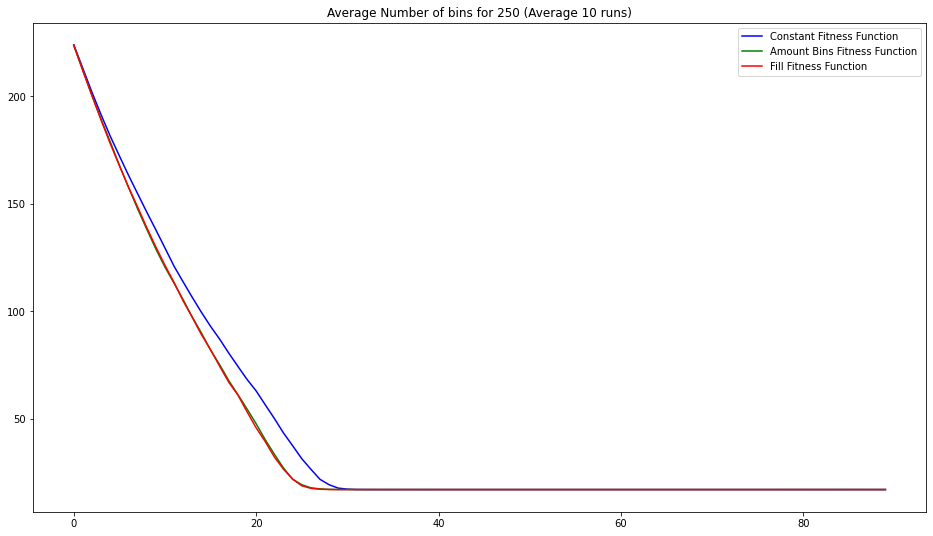

In [10]:
av_number = 10
number_generations = 90
average_vals_const = np.zeros((av_number, number_generations))
average_vals_amount_bins = np.zeros((av_number, number_generations))
average_vals_fill = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'constant', 'first_fit')
    _,_, average_vals_const[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'first_fit')
    _,_, average_vals_amount_bins[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'fill', 'first_fit')
    _,_, average_vals_fill[index], _,_,_ = GA.run()

# calc average
average_vals_const = np.average(average_vals_const, 0)
average_vals_amount_bins = np.average(average_vals_amount_bins, 0)
average_vals_fill = np.average(average_vals_fill, 0)

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(1,figsize=(16,9))
ax.set_title(f'Average Number of bins for {len(medium_objects)} (Average {av_number} runs)')
ax.plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax.plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax.plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')

plt.legend()
plt.show()

# Large Problem

## Random Fit

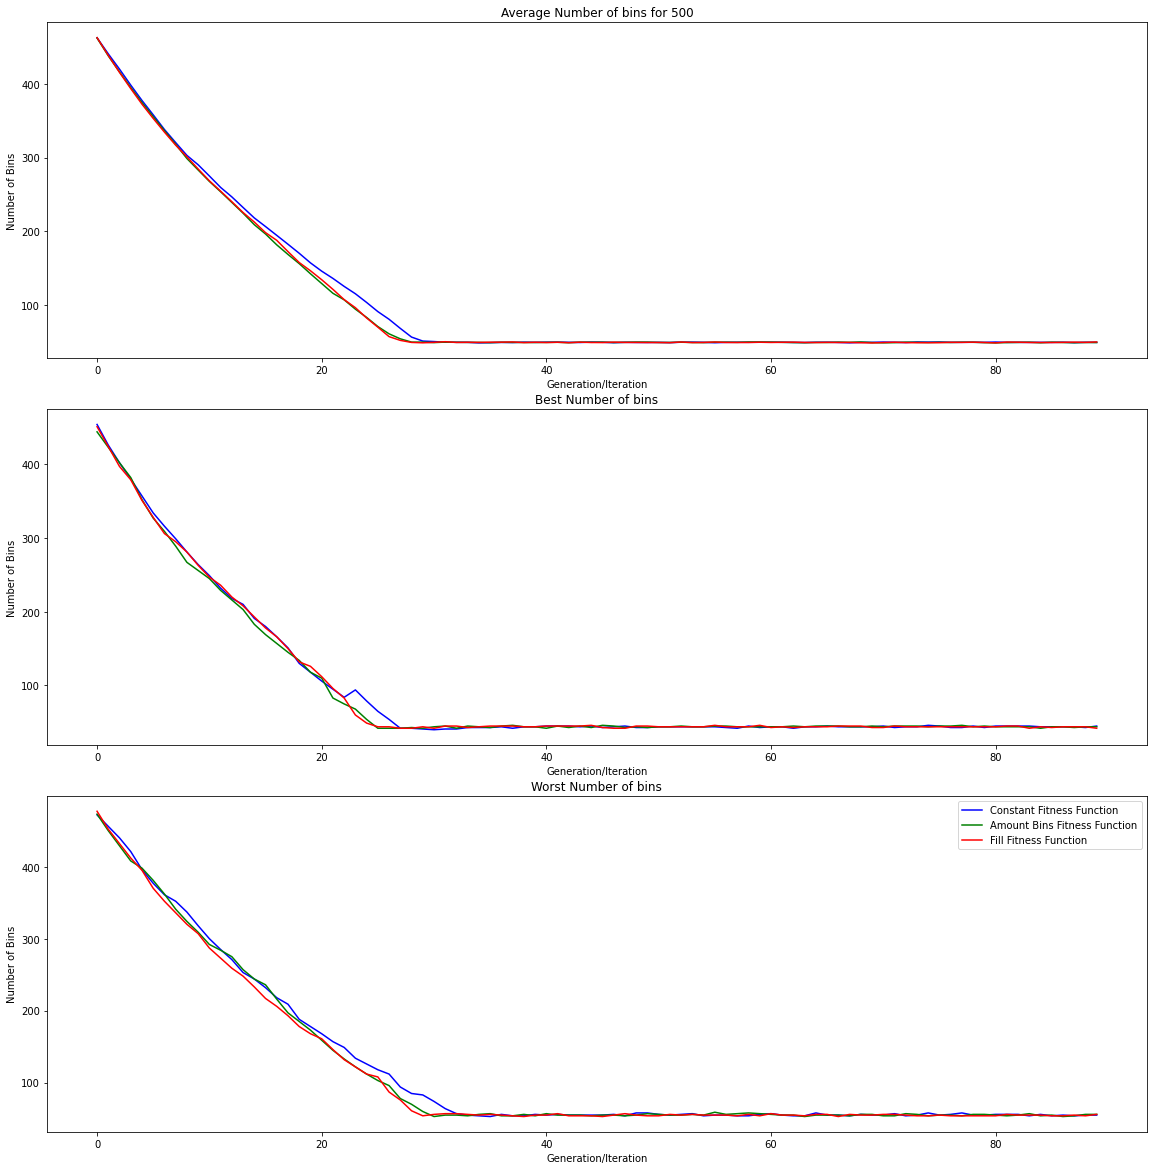

In [11]:
number_generations = 90
GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'constant', 'random')
solution_const, all_time_best_const, average_vals_const, best_vals_const, worst_vals_const, runtime_const = GA.run()
GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
solution_amount_bins, all_time_best_amount_bins, average_vals_amount_bins, best_vals_amount_bins, worst_vals_amount_bins, runtime_amount_bins = GA.run()
GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
solution_fill, all_time_best_fill, average_vals_fill, best_vals_fill, worst_vals_fill, runtime_fill = GA.run()

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(large_objects)}')
ax[0].plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax[0].plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[0].plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals_const, color="blue", label = 'Constant Fitness Function')
ax[1].plot(x_vals, best_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[1].plot(x_vals, best_vals_fill, color="red", label = 'Fill Fitness Function')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals_const, color="blue", label = 'Constant Fitness Function')
ax[2].plot(x_vals, worst_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[2].plot(x_vals, worst_vals_fill, color="red", label = 'Fill Fitness Function')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

## Random (average)

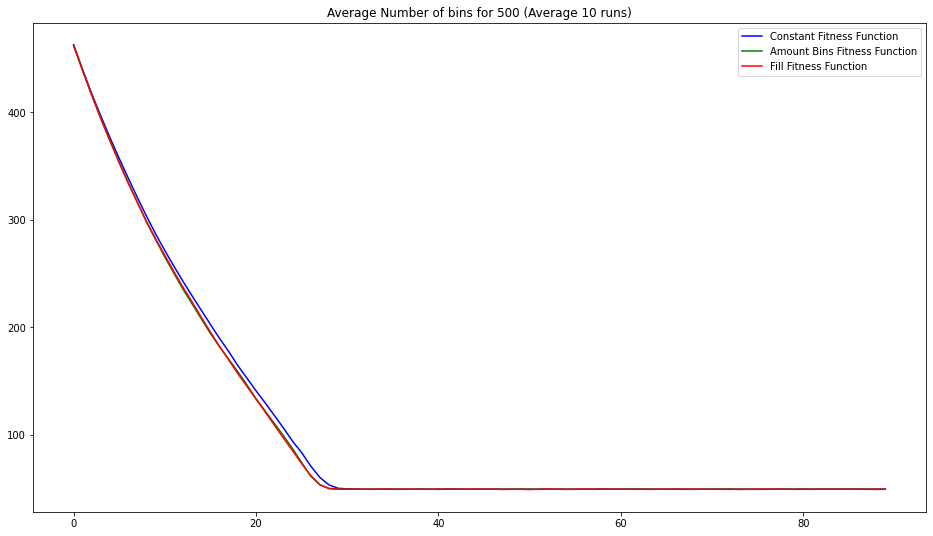

In [12]:
av_number = 10
number_generations = 90
average_vals_const = np.zeros((av_number, number_generations))
average_vals_amount_bins = np.zeros((av_number, number_generations))
average_vals_fill = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'constant', 'random')
    _,_, average_vals_const[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'random')
    _,_, average_vals_amount_bins[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'fill', 'random')
    _,_, average_vals_fill[index], _,_,_ = GA.run()

# calc average
average_vals_const = np.average(average_vals_const, 0)
average_vals_amount_bins = np.average(average_vals_amount_bins, 0)
average_vals_fill = np.average(average_vals_fill, 0)

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(1,figsize=(16,9))
ax.set_title(f'Average Number of bins for {len(large_objects)} (Average {av_number} runs)')
ax.plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax.plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax.plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')

plt.legend()
plt.show()

## First Fit

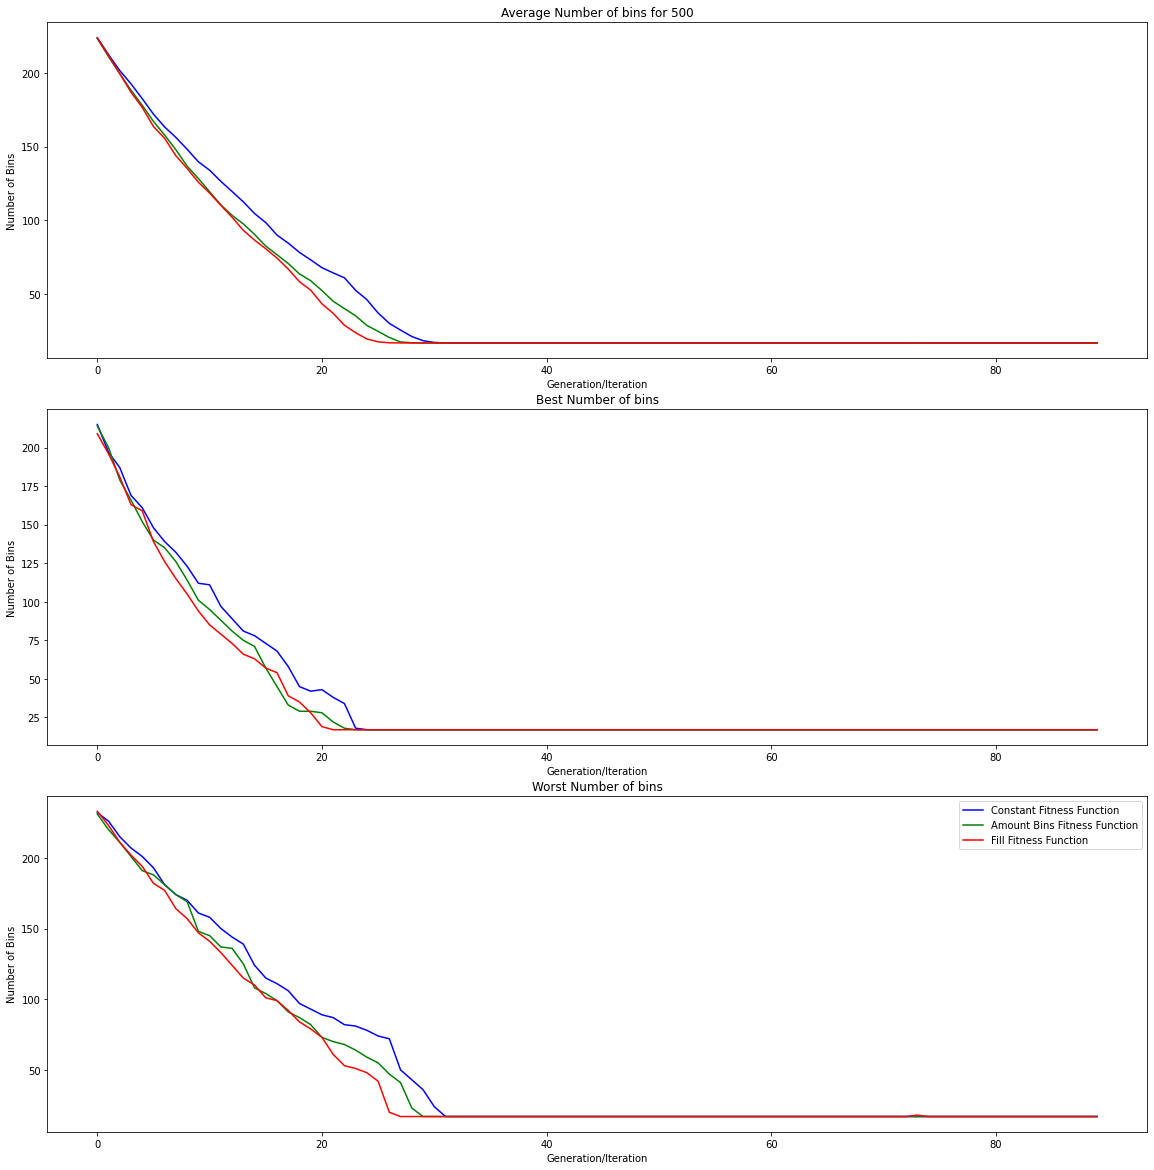

In [13]:
number_generations = 90
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'constant', 'first_fit')
solution_const, all_time_best_const, average_vals_const, best_vals_const, worst_vals_const, runtime_const = GA.run()
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'first_fit')
solution_amount_bins, all_time_best_amount_bins, average_vals_amount_bins, best_vals_amount_bins, worst_vals_amount_bins, runtime_amount_bins = GA.run()
GA = GeneticAlgorithm(medium_objects, 80, medium_container[0], medium_container[1], 0.8, 0.05, number_generations, 'fill', 'first_fit')
solution_fill, all_time_best_fill, average_vals_fill, best_vals_fill, worst_vals_fill, runtime_fill = GA.run()

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=3)
ax[0].set_title(f'Average Number of bins for {len(large_objects)}')
ax[0].plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax[0].plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[0].plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')
ax[0].set_xlabel('Generation/Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title('Best Number of bins')
ax[1].plot(x_vals, best_vals_const, color="blue", label = 'Constant Fitness Function')
ax[1].plot(x_vals, best_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[1].plot(x_vals, best_vals_fill, color="red", label = 'Fill Fitness Function')
ax[1].set_xlabel('Generation/Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title('Worst Number of bins')
ax[2].plot(x_vals, worst_vals_const, color="blue", label = 'Constant Fitness Function')
ax[2].plot(x_vals, worst_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax[2].plot(x_vals, worst_vals_fill, color="red", label = 'Fill Fitness Function')
ax[2].set_xlabel('Generation/Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

## First Fit (average)

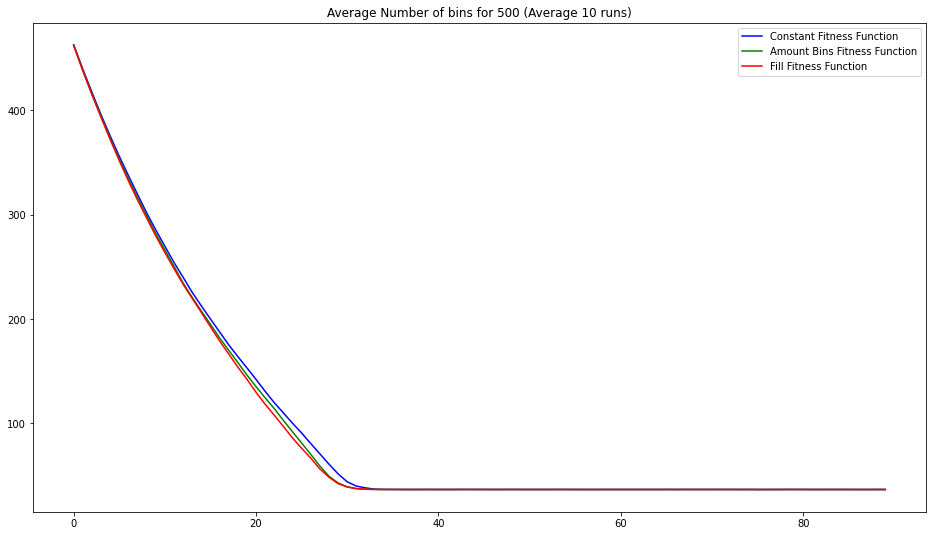

In [14]:
av_number = 10
number_generations = 90
average_vals_const = np.zeros((av_number, number_generations))
average_vals_amount_bins = np.zeros((av_number, number_generations))
average_vals_fill = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'constant', 'first_fit')
    _,_, average_vals_const[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'amount_bins', 'first_fit')
    _,_, average_vals_amount_bins[index], _,_,_ = GA.run()
    GA = GeneticAlgorithm(large_objects, 80, large_container[0], large_container[1], 0.8, 0.05, number_generations, 'fill', 'first_fit')
    _,_, average_vals_fill[index], _,_,_ = GA.run()

# calc average
average_vals_const = np.average(average_vals_const, 0)
average_vals_amount_bins = np.average(average_vals_amount_bins, 0)
average_vals_fill = np.average(average_vals_fill, 0)

# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(1,figsize=(16,9))
ax.set_title(f'Average Number of bins for {len(large_objects)} (Average {av_number} runs)')
ax.plot(x_vals, average_vals_const, color="blue", label = 'Constant Fitness Function')
ax.plot(x_vals, average_vals_amount_bins, color="green", label = 'Amount Bins Fitness Function')
ax.plot(x_vals, average_vals_fill, color="red", label = 'Fill Fitness Function')

plt.legend()
plt.show()